## Importing Library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

## Loading, Cleaning and Spliting Data

In [2]:
data_directory = r"Images"

In [3]:
IMG_SIZE = (150, 150)

In [4]:
BATCH_SIZE = 10

In [5]:
datagen = ImageDataGenerator(
    rescale=1.0/255,  
    validation_split=0.2  
)

In [6]:
# Load training data from the directory
train_generator = datagen.flow_from_directory(
    directory=data_directory,  
    target_size=IMG_SIZE,  
    batch_size=BATCH_SIZE,
    class_mode='binary',  
    subset='training'  
)

Found 64 images belonging to 2 classes.


In [7]:
# Load validation data from the directory
validation_generator = datagen.flow_from_directory(
    directory=data_directory,  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  
    subset='validation'  
)

Found 16 images belonging to 2 classes.


## Model Evaluation

In [8]:
# Building the CNN model
model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2), 

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

C:\Users\ashis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Early stopping callback to prevent overfitting by monitoring validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30


C:\Users\ashis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.6272 - loss: 0.8595 - val_accuracy: 0.8750 - val_loss: 0.6777
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.5288 - loss: 0.6760 - val_accuracy: 0.5625 - val_loss: 0.5989
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.6820 - loss: 0.5586 - val_accuracy: 0.9375 - val_loss: 0.4649
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.7117 - loss: 0.4128 - val_accuracy: 0.8750 - val_loss: 0.4239
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.8780 - loss: 0.3544 - val_accuracy: 0.7500 - val_loss: 0.7741
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.7889 - loss: 0.5409 - val_accuracy: 0.7500 - val_loss: 0.5563
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.8806 - loss: 0.3619 - val_accuracy: 0.9375 - val_loss: 0.2079
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9517 - loss: 0.2144 - val_accuracy: 0.9375 - val_loss: 0.1873
Epo

## Acurracy Explanation

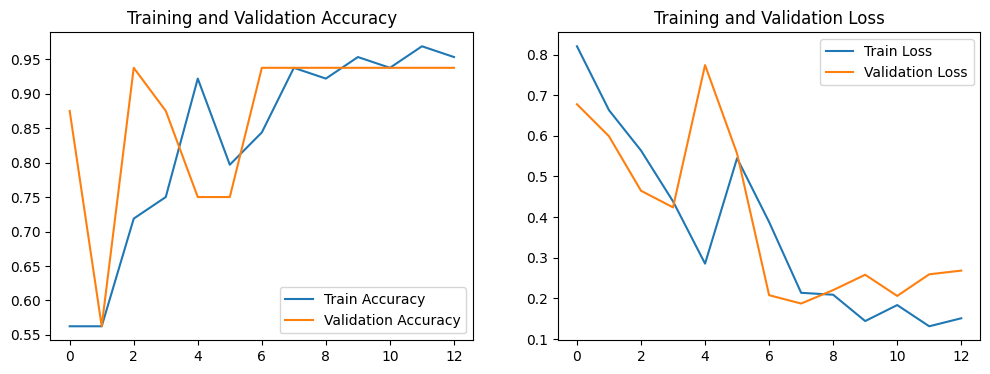

In [12]:
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Saving the Model

In [13]:
# Save the trained model to disk
model.save('covid_classifier_cnn.h5')
print("Model saved as covid_classifier_cnn.h5")

Model saved as covid_classifier_cnn.h5


In [23]:
# Function to classify a new image
def classify_image(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)

    class_label = 'COVID Negative' if prediction[0] > 0.5 else 'COVID Positive'
    print(f"Prediction: {class_label} (Confidence: {prediction[0][0]:.2f})")


In [24]:
classify_image(r'Images/Nor/00001281_000.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: COVID Negative (Confidence: 0.88)
